In [114]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

factor1 = 'Valence'
factor1_levels = ('Negative', 'Positive')
factor2 = 'Arousal'
factor2_levels = ('Low', 'High')

In [115]:
def make_2x2plot(data, ax=None):
    if ax is None:
        fig, ax = plt.subplots()

    nobs = data.shape[-1]
    lims = (data.min()*1.2, data.max()*1.1)

    for k in range(nobs):
        ax.plot((data[0,0,k], data[1,0,k]), (data[0,1,k], data[1,1,k]), c=[0,0,0,0.1])

    h1 = ax.scatter(data[0,0], data[0,1])
    h2 = ax.scatter(data[1,0], data[1,1])

    ax.set_xlim(lims)
    ax.set_ylim(lims)
    ax.plot(lims, lims, 'k:')
    ax.set_aspect('equal')
    ax.set_xlabel('{} = {}'.format(factor2, factor2_levels[0]))
    ax.set_ylabel('{} = {}'.format(factor2, factor2_levels[1]))

    ax.legend((h1, h2), ('{} = {}'.format(factor1, factor1_levels[0]), '{} = {}'.format(factor1, factor1_levels[1])))

In [116]:
def make_data(nobs=40, cov=None):
    if cov is None:
        cov = (np.ones((4,4)) + np.eye(4))
    data = np.random.multivariate_normal(np.zeros(4), cov, size=nobs)
    data = data.reshape((nobs, 2, 2)).T
    return data

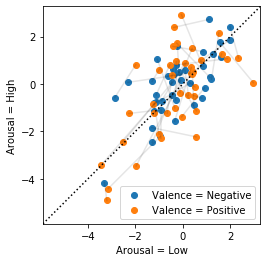

In [117]:
make_2x2plot(make_data())

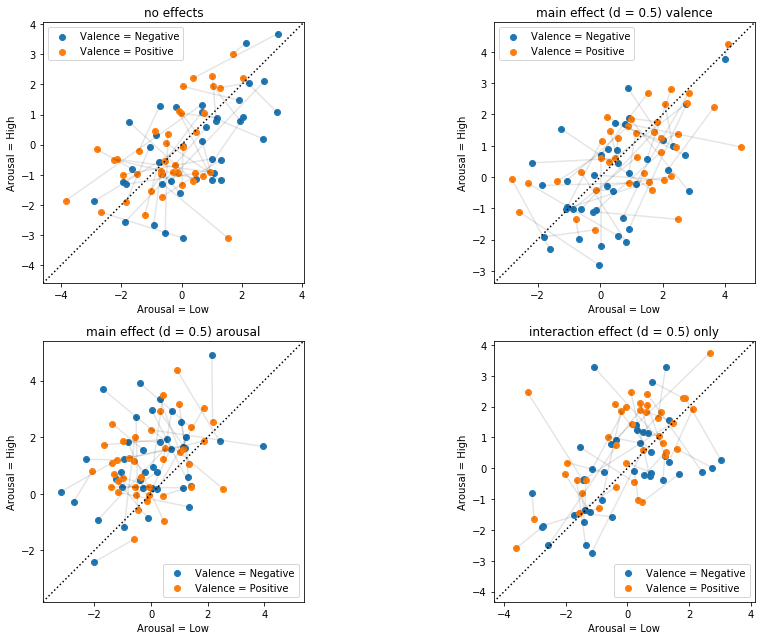

In [118]:
plt.rcParams["figure.figsize"] = (14,9)

fig, ax = plt.subplots(2,2)
ax = ax.ravel()

make_2x2plot(make_data(), ax=ax[0])
ax[0].set_title('no effects')

data = make_data()
data[1] += 1
make_2x2plot(data, ax=ax[1])
ax[1].set_title('main effect (d = 0.5) valence')

data = make_data()
data[:,1] += 1
make_2x2plot(data, ax=ax[2])
ax[2].set_title('main effect (d = 0.5) arousal')

data = make_data()
data[1,1] += 1
make_2x2plot(data, ax=ax[3])
ax[3].set_title('interaction effect (d = 0.5) only')

fig.tight_layout()
fig.set_facecolor('w')